# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This project calls for a binary classification supervised learning model since we only need to predict whether a student will graduate or not.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [530]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score


# Read student data
student_data = pd.read_csv("student-data.csv")
print ("Student data read successfully!")



Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [531]:


# downsampling data to balance the number of passed and failed samples
#student_data_passed = student_data[(student_data['passed']=='yes')].sample(n=130)
#student_data_failed = student_data[(student_data['passed']=='no')].sample(n=130)
#student_data = pd.concat([student_data_passed,student_data_failed])
#student_data.drop(student_data.columns[[1]], axis=1, inplace=True)

shape=student_data.shape

# TODO: Calculate number of students
n_students = shape[0]

# TODO: Calculate number of features
n_features = shape[1] - 1 #exclude target column

# TODO: Calculate passing students
n_passed = len(student_data[(student_data['passed']=='yes')])

# TODO: Calculate failing students
n_failed = len(student_data[(student_data['passed']=='no')])

# TODO: Calculate graduation rate
grad_rate = 100.00 * n_passed / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

#
from sklearn.metrics import f1_score
print "\nF1 score for predicting all 'yes': {:.4f}".format(
    f1_score(y_true = ['yes']*n_passed + ['no']*n_failed, y_pred = ['yes']*n_students, pos_label='yes', average='binary'))




Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%

F1 score for predicting all 'yes': 0.8030


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [532]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()



Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


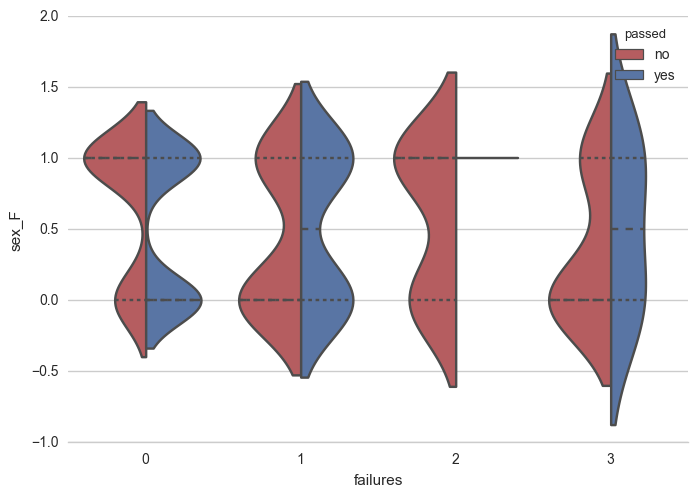

In [533]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
student_data_tmp = X_all.join(y_all)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="failures", y="sex_F", hue="passed", data=student_data_tmp, split=True, inner="quart", palette={"yes": "b", "no": "r"})
sns.despine(left=True)


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [534]:
# TODO: Import any additional functionality you may need here
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = None
X_test = None
y_train = None
y_test = None
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.24, random_state=1, stratify=y_all)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

# Rescale X values
from sklearn.preprocessing import Normalizer
normer = Normalizer()
X_train = normer.fit_transform(X_train)
X_test = normer.transform(X_test)


Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

Three models that are appropriate for this problem are:

K-Nearest Neighbor

One real-world example of using K-nearest neigbors is in identifying competition when conducting market research. In the case of automobile production, identifying competitor's existing automobiles that have similar features to a planned prototype will help the marketing department plan their promotions accordingly. Reference: http://www.datasciencecentral.com/profiles/blogs/introduction-to-the-k-nearest-neighbor-knn-algorithm

KNN performs well when there are only a few eroneous or outlier data. Because it searches through the entire training set evertime it makes predictions, it performs poorly when faced with a large number of input variables. KNN is a good candidate for the student intervention system because of the small data size and the fact that the data contains only a few significant input variables. 

Support Vector Machine (SVM)

SVM has been applied to real-world problems including handwriting recognition: http://lmb.informatik.uni-freiburg.de/people/bahlmann/data/ba_ha_bu_iwfhr02-foils.pdf

The advantage of SVMs is that they work well with a wide variety of problems. The disadvantage is that you have to properly set some parameters for SVMs to provide the best classification results.

With proper tuning of parameters, SVM will be a good candidate for the student intervention system.

    
Stochastic Gradient Descent

A gradient descent algorithm finds the best predictive model by assigning weights to each feature and measures the "wrongness" of the algorithm when processing training data. The weights are gradually updated until the "wrongness" or cost function is at it's lowest point. Stochastic gradient descent is a variant of the gradient descent algorithm that passes through the entire dataset only once.

One real-word application of Stochastic Gradient Descent is predicting employee satisfaction based on factors like salary https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer

The advantage of a Stochastic gradient descent is that it is computationally less expensive and therefore ideal for very large datasets.

One disadvantage of stochastic gradient descent is that the model with the lowest cost function might not be the best possible model to use (though it will still be a very good one).

Stochastic gradient descent is a good model to use for the student intervention system as far as data continues to increase. 




### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [535]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [536]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB # model_A
from sklearn.linear_model import SGDClassifier # model_B
from sklearn.neighbors import KNeighborsClassifier # model_C
from sklearn import svm # model_D
from sklearn import tree # model_E
from sklearn.linear_model import LogisticRegression


# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SGDClassifier(random_state=1)
clf_C = KNeighborsClassifier()
clf_D = svm.SVC(random_state=1)
clf_E = tree.DecisionTreeClassifier(random_state=1)
clf_F = LogisticRegression(random_state=1)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    train_predict(clf, X_train_100, y_train_100, X_test, y_test)
    train_predict(clf, X_train_200, y_train_200, X_test, y_test)
    train_predict(clf, X_train_300, y_train_300, X_test, y_test)
    print "\n\r"

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0015 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.4884.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.3457.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0009 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.7909.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.6777.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8078.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7132.


Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0007 seconds
Made predictions in 0.0001 seconds.
F1 score for training set: 0.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.0000.
Training a SGDClassifier using a training set size of 200. . .
Trained mode

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - K-Nearest Neighbor**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |                   0.0006|                  0.0017|            0.8252|           0.7727|
| 200               |                   0.0007|                  0.0017|            0.8643|           0.7077|
| 300               |                   0.0007|                  0.0023|            0.8525|           0.7634|

** Classifer 2 - Support Vector Machine**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |                   0.0011|                  0.0006|            0.7805|           0.8050|
| 200               |                   0.0029|                  0.0010|            0.8060|           0.8050|
| 300               |                   0.0058|                  0.0016|            0.8024|           0.8050|

** Classifer 3 - Stochastic Gradient Descent**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |                   0.0010|                  0.0001|            0.7805|           0.8050|
| 200               |                   0.0011|                  0.0001|            0.8060|           0.8050|
| 300               |                   0.0011|                  0.0001|            0.8024|           0.8050|

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

After doing a spot check of several different models for predicting whether or not a student is likely to fail and thus need intervention, I chose to use the Logistic Regression classifier, which was the fastest in making predictions, and share the highest accuracy score with Support Vector machines among the models tested. 



### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

Logistic regression is named after the function used at its core: the logistic function.

The logistic function can take in any real value and, after processing its input, produces a number between 0 and 1, which is appropriate for classification problems involving two classes - passed or failed in the case of our student intervention system. The logistic function is also referred to as a sigmoid function since graphing this function produces an S-like curve. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.

![SVM](http://3qeqpr26caki16dnhd19sv6by6v.wpengine.netdna-cdn.com/wp-content/uploads/2016/03/Logistic-Function.png)

Student properties such as sex or age are assigned weights and are passed into a function that computes an output that classifies the student as either passed or failed.

The algorithm learns by adjusting the weights on a training data set until it obtains a high enough classification accuracy. Once training is done, the algorithm will accept new student data and will predict whether they would pass or fail.



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

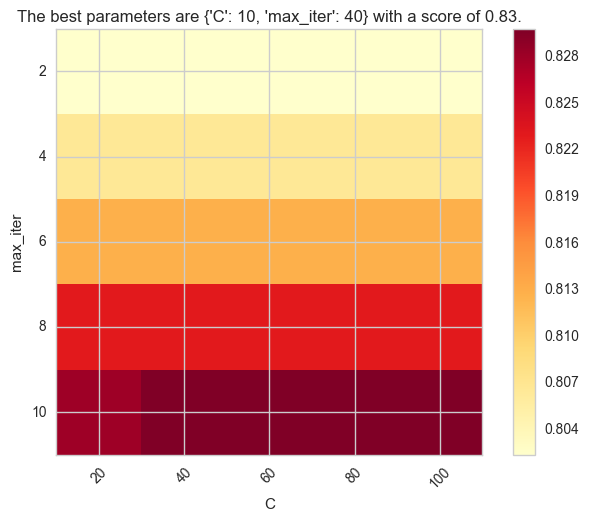

Best Estimator: 
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=40, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='lbfgs', tol=1e-06,
          verbose=0, warm_start=False)
Made predictions in 0.0002 seconds.
Tuned model has a training F1 score of 0.8323.
Made predictions in 0.0001 seconds.
Tuned model has a testing F1 score of 0.8105.


In [560]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Create the parameters list you wish to tune

def visual_gridsearch(model, X, y):
    y_range = [2,4,6,8,10]
    X_range = [20,40,60,80,100]
    param_grid = {'max_iter':[20,40,60,80,100], 'C':[2,4,6,8,10]}
    
    grid = GridSearchCV(model, param_grid=param_grid, scoring=f1_scorer, cv=10)
    grid.fit(X, y)
    
    scores = [x[1] for x in grid.grid_scores_]    
    scores = np.array(scores).reshape(len(X_range), len(y_range))

    plt.figure()
    #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap='YlOrRd')
    plt.ylabel('max_iter')
    plt.xlabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(X_range)), X_range, rotation=45)
    plt.yticks(np.arange(len(y_range)), y_range)
    plt.title(
        "The best parameters are {} with a score of {:0.2f}.".format(
        grid.best_params_, grid.best_score_)
    )
    plt.show()

visual_gridsearch(LogisticRegression(random_state=1,solver='lbfgs',tol=0.000001,fit_intercept=False,dual=False,intercept_scaling=1,class_weight=None,multi_class='ovr'), X_train, y_train)

parameters = {'max_iter':[40], 'C':[10]}

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=1,solver='lbfgs',tol=0.000001,fit_intercept=False,dual=False,intercept_scaling=1,class_weight=None,multi_class='ovr')

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print 'Best Estimator: \n\r', clf



# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
The final model's F<sub>1</sub> scores for training and testing are 0.8323 and 0.8105 respectively. These scores are now more accurate than the F<sub>1</sub> scores on the untuned model when given 300 data items.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.